#### This notebook calculates SSIM across different registration status, and different methods, respectively.

In [1]:
import os
import sys
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

sys.path.append('E:/REGISTRATION_SOFTWARE/algorithm/cell_level_regist/paper/code/result_analysis')
from img_based_analysis import gen_binset_img, calculate_ssim

In [2]:
def gen_df_dif_regis(all_data_output, mark_data, mtd, pixel_size, output_img_dir):
    """
    generate dataframe of MSSIM of .obsm['spatial'], .obsm['spatial_rigid'] and .obsm['spatial_elas']
    """
    regis_scores = {}
    
    sh_0_li = []
    sh_1_li = []
    regis_arr_img_li = {}
    for regis in ['spatial', 'spatial_rigid', 'spatial_elas']:
        print(regis)
        fo = [fo for fo in os.listdir(all_data_output) if mark_data in fo and mtd in fo][0]
        dir = os.path.join(all_data_output, fo)
        fname_int_li = [int(fname.replace('.h5ad', '')) for fname in os.listdir(dir) if fname.endswith('.h5ad')]
        fname_int_li.sort()
        fname_li = [str(fname_int) + '.h5ad' for fname_int in fname_int_li]
        dir_li = [os.path.join(dir, fname) for fname in fname_li]

        arr_img_li, arr_ctype_li, ty_li, _ = gen_binset_img(dir_li, pixel_size= pixel_size, output_img_dir=output_img_dir, spa_col=regis, ctype_col='annotation')  # fixme
        sh_0_li.append(arr_img_li[0].shape[0])
        sh_1_li.append(arr_img_li[0].shape[1])
        regis_arr_img_li[regis] = arr_img_li
        
    # 修正图像大小不一的情况
    sh_0 = np.array(sh_0_li).max()
    sh_1 = np.array(sh_1_li).max()
    for regis in ['spatial', 'spatial_rigid', 'spatial_elas']:
        regis_arr_img_li[regis] = [np.concatenate([arr, np.zeros((sh_0 - arr.shape[0], arr.shape[1]))], axis=0) for arr in regis_arr_img_li[regis]]
        regis_arr_img_li[regis] = [np.concatenate([arr, np.zeros((arr.shape[0], sh_1 - arr.shape[1]))], axis=1) for arr in regis_arr_img_li[regis]]
        
    for  regis in ['spatial', 'spatial_rigid', 'spatial_elas']:
        mssim_li = calculate_ssim(regis_arr_img_li[regis], output_img_dir=output_img_dir, intersect_only=False)  # fixme
        regis_scores[regis] = mssim_li
        
    df = pd.DataFrame.from_dict(regis_scores)
    return df

In [3]:
def gen_df_dif_method(all_data_output, mark_data, mtd_li, pixel_size, output_img_dir, ctype_col='annotation'):
    """
    generate dataframe of MSSIM across different methods
    """
    regis_scores = {}
    
    # for regis in ['spatial', 'spatial_rigid', 'spatial_elas']:
    
    sh_0_li = []
    sh_1_li = []
    mtd_arr_img_li = {}
    for mtd in mtd_li:
        if mtd == 'ours':
            regis = 'spatial_elas'
        else:
            regis = 'spatial_rigid'
        print(mtd, regis)
        fo = [fo for fo in os.listdir(all_data_output) if mark_data in fo and mtd in fo][0]
        dir = os.path.join(all_data_output, fo)
        fname_int_li = [int(fname.replace('.h5ad', '')) for fname in os.listdir(dir) if fname.endswith('.h5ad')]
        fname_int_li.sort()
        fname_li = [str(fname_int) + '.h5ad' for fname_int in fname_int_li]
        dir_li = [os.path.join(dir, fname) for fname in fname_li]

        arr_img_li, arr_ctype_li, ty_li, _ = gen_binset_img(dir_li, pixel_size= pixel_size, output_img_dir=output_img_dir, spa_col=regis, ctype_col=ctype_col)  # fixme

        sh_0_li.append(arr_img_li[0].shape[0])
        sh_1_li.append(arr_img_li[0].shape[1])
        
        mtd_arr_img_li[mtd] = arr_img_li
    
    # 修正图像大小不一的情况
    sh_0 = np.array(sh_0_li).max()
    sh_1 = np.array(sh_1_li).max()
    for mtd in mtd_li:
        mtd_arr_img_li[mtd] = [np.concatenate([arr, np.zeros((sh_0 - arr.shape[0], arr.shape[1]))], axis=0) for arr in mtd_arr_img_li[mtd]]
        mtd_arr_img_li[mtd] = [np.concatenate([arr, np.zeros((arr.shape[0], sh_1 - arr.shape[1]))], axis=1) for arr in mtd_arr_img_li[mtd]]
        
    for mtd in mtd_li:
        mssim_li = calculate_ssim(mtd_arr_img_li[mtd], output_img_dir=output_img_dir, intersect_only=False)  # fixme

        regis_scores[mtd] = mssim_li
    df = pd.DataFrame.from_dict(regis_scores)
    return df

##### Calculate SSIM of raw data,  of data after rigid registration, and of data after elastic registration, of drosophila embryo, and drosophila larva

In [39]:
all_data_output = 'E:/REGISTRATION_SOFTWARE/algorithm/cell_level_regist/paper/output_data/our_pipeline'
mark_data = 'drosophila_embryo' 
mtd = 'ours'
output_img_dir = 'E:/REGISTRATION_SOFTWARE/algorithm/cell_level_regist/paper/result_analysis/SSIM/ctype_img_drosophila_larva' # None
# recommended pixel_size: math.sqrt(2) * binset_size todo: 写入函数
# fruitfly_embryo: pixel_size=1
# fruitfly_larva: pixel_size=3.5
# DLPFC: pixel_size=213
pixel_size = 1
df_droso_embryo = gen_df_dif_regis(all_data_output, mark_data, mtd, pixel_size, output_img_dir)

spatial
0 / 15
1 / 15
2 / 15
3 / 15
4 / 15
5 / 15
6 / 15
7 / 15
8 / 15
9 / 15
10 / 15
11 / 15
12 / 15
13 / 15
14 / 15
15 / 15
spatial_rigid
0 / 15
1 / 15
2 / 15
3 / 15
4 / 15
5 / 15
6 / 15
7 / 15
8 / 15
9 / 15
10 / 15
11 / 15
12 / 15
13 / 15
14 / 15
15 / 15
spatial_elas
0 / 15
1 / 15
2 / 15
3 / 15
4 / 15
5 / 15
6 / 15
7 / 15
8 / 15
9 / 15
10 / 15
11 / 15
12 / 15
13 / 15
14 / 15
15 / 15


In [38]:
df_droso_embryo

,PASTE,PASTE2,ours
0,0.740645,0.720364,0.749061
1,0.742724,0.745070,0.738757
2,0.698274,0.709805,0.734992
3,0.768629,0.757415,0.732550
4,0.701929,0.701934,0.724866
5,0.613785,0.600109,0.550153
6,0.427791,0.463321,0.502706
7,0.542243,0.493413,0.556836
8,0.504406,0.553972,0.535935
9,0.486618,0.525402,0.574026


In [7]:
all_data_output = 'E:/REGISTRATION_SOFTWARE/algorithm/cell_level_regist/paper/output_data/our_pipeline'
mark_data = 'drosophila_embryo' 
mtd_li = ['PASTE', 'PASTE2', 'ours']
output_img_dir = None 
pixel_size = 1
df_droso_embryo = gen_df_dif_method(all_data_output, mark_data, mtd_li, pixel_size, output_img_dir)

PASTE spatial_rigid
0 / 15
1 / 15
2 / 15
3 / 15
4 / 15
5 / 15
6 / 15
7 / 15
8 / 15
9 / 15
10 / 15
11 / 15
12 / 15
13 / 15
14 / 15
15 / 15
PASTE2 spatial_rigid
0 / 15
1 / 15
2 / 15
3 / 15
4 / 15
5 / 15
6 / 15
7 / 15
8 / 15
9 / 15
10 / 15
11 / 15
12 / 15
13 / 15
14 / 15
15 / 15
ours spatial_elas
0 / 15
1 / 15
2 / 15
3 / 15
4 / 15
5 / 15
6 / 15
7 / 15
8 / 15
9 / 15
10 / 15
11 / 15
12 / 15
13 / 15
14 / 15
15 / 15


In [41]:
df_droso_embryo

,spatial,spatial_rigid,spatial_elas
0,0.717262,0.719743,0.727472
1,0.718100,0.726535,0.716282
2,0.676091,0.659998,0.712193
3,0.737770,0.733141,0.709541
4,0.672332,0.675452,0.701196
5,0.572935,0.575019,0.511452
6,0.392676,0.374299,0.459923
7,0.492782,0.506529,0.518709
8,0.476442,0.471230,0.496010
9,0.436798,0.427405,0.537378


Text(0, 0.5, 'MSSIM score')

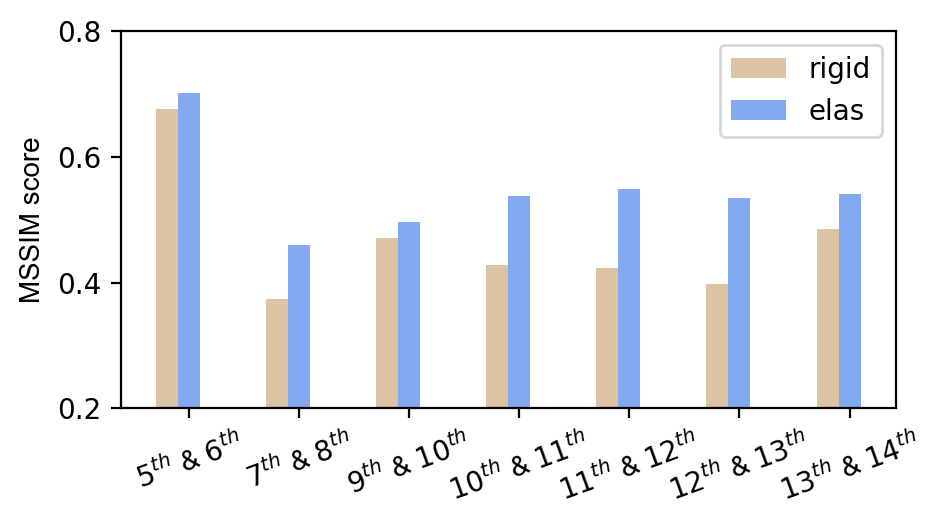

In [56]:
width_ = 0.2
df_ind_li = [4,6,8,9,10,11,12]
mtd2col = {'spatial_rigid': 'tan','spatial_elas':'cornflowerblue'}

def int2order(ind):
    if ind == 1:
        return '$1^{%02s}$' % ('st')
    elif ind == 2:
        return '$2^{%02s}$' % ('nd')
    elif ind == 3:
        return '$3^{%02s}$' % ('rd')
    else:
        return '$%01d^{%02s}$' % (ind, 'th')
    
plt.figure(figsize=(5,2.5), dpi=200)
df = df_droso_embryo.loc[df_ind_li].reset_index()
for i, col in enumerate(df.columns.tolist()[2:]):
    plt.bar(df.index + i*width_, 
             df[col], 
             width=width_, 
             label=col.split('_')[1], 
             color=mtd2col[col],
           alpha=0.8)

plt.legend(loc='upper right')

plt.xticks(np.arange(0.2, 0.81, 0.2))
plt.ylim(0.2, 0.8)

plt.xticks(ticks=df.index+width_, labels=[' & '.join([int2order(ind+1), int2order(ind+2)]) for ind in df_ind_li], fontname='Arial', rotation=20)
plt.ylabel('MSSIM score', fontname='Arial')

# plt.ylabel('Pair')

Text(0.5, 0, 'score')

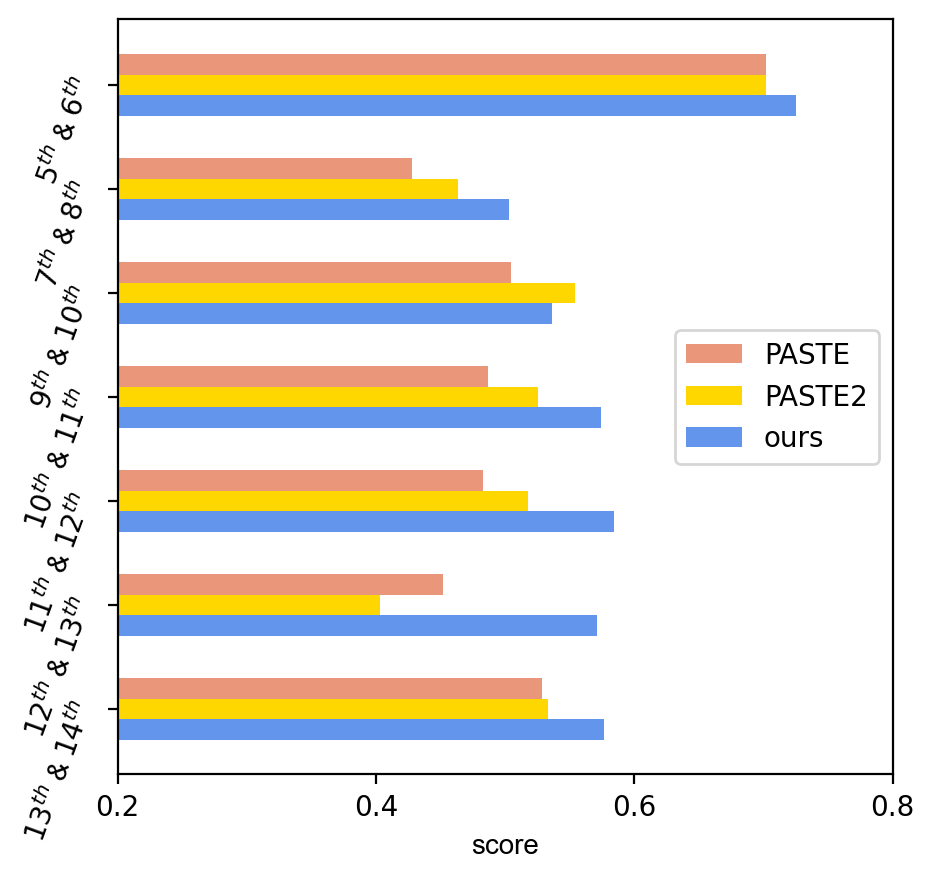

In [37]:
width_ = 0.2
df_ind_li = [4,6,8,9,10,11,12]
mtd2col = {'ours': 'cornflowerblue', 'ours_ablation': 'tan', 'PASTE': 'darksalmon', 'PASTE2': 'gold'}

def int2order(ind):
    if ind == 1:
        return '$1^{%02s}$' % ('st')
    elif ind == 2:
        return '$2^{%02s}$' % ('nd')
    elif ind == 3:
        return '$3^{%02s}$' % ('rd')
    else:
        return '$%01d^{%02s}$' % (ind, 'th')
    
plt.figure(figsize=(5,5), dpi=200)
df = df_droso_embryo.loc[df_ind_li].reset_index()
for i, col in enumerate(df.columns.tolist()[1:]):
    plt.barh( -1 * (df.index + i*width_), 
             df[col], 
             height=width_, 
             label=col, 
             color=mtd2col[col])

plt.legend(loc='center right')

plt.xticks(np.arange(0.2, 0.81, 0.2))
plt.xlim(0.2, 0.8)

plt.yticks(ticks=-1 * (df.index+width_), labels=[' & '.join([int2order(ind+1), int2order(ind+2)]) for ind in df_ind_li], fontname='Arial', rotation=70)
plt.xlabel('score', fontname='Arial')
# plt.ylabel('Pair')

In [13]:
df.columns.tolist()

['index', 'PASTE', 'PASTE2', 'ours']

In [ ]:
out_dir  = 'E:/REGISTRATION_SOFTWARE/algorithm/cell_level_regist/paper/result_analysis/SSIM'  # change this to your directory to save the csv file, in order to reproduce figure in the paper
df_droso_embryo.to_csv(os.path.join(out_dir, 'drosophila_embryo_dif_regis.csv'))

##### Calculate SSIM of raw data, of data after rigid registration, and of data after elastic registration, of drosophila larva

In [25]:
all_data_output = 'E:/REGISTRATION_SOFTWARE/algorithm/cell_level_regist/paper/output_data/our_pipeline'
mark_data = 'drosophila_larva'
mtd = 'ours'
output_img_dir = None
# recommended pixel_size: math.sqrt(2) * binset_size todo: 写入函数
# fruitfly_embryo: pixel_size=1
# fruitfly_larva: pixel_size=3.5
# DLPFC: pixel_size=213
pixel_size = 3.5
df_droso_larva = gen_df_dif_regis(all_data_output, mark_data, mtd, pixel_size, output_img_dir)

spatial
0 / 15
1 / 15
2 / 15
3 / 15
4 / 15
5 / 15
6 / 15
7 / 15
8 / 15
9 / 15
10 / 15
11 / 15
12 / 15
13 / 15
14 / 15
15 / 15
spatial_rigid
0 / 15
1 / 15
2 / 15
3 / 15
4 / 15
5 / 15
6 / 15
7 / 15
8 / 15
9 / 15
10 / 15
11 / 15
12 / 15
13 / 15
14 / 15
15 / 15
spatial_elas
0 / 15
1 / 15
2 / 15
3 / 15
4 / 15
5 / 15
6 / 15
7 / 15
8 / 15
9 / 15
10 / 15
11 / 15
12 / 15
13 / 15
14 / 15
15 / 15


Text(0.5, 0, 'score')

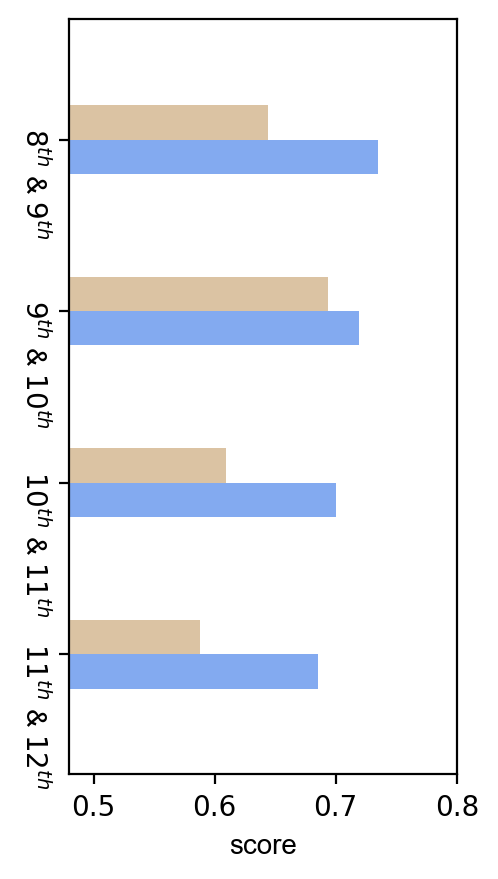

In [28]:
width_ = 0.2
df_ind_li = [7,8,9,10]
ty2col = {'rigid': 'tan',
                'elas':'cornflowerblue'}
def int2order(ind):
    if ind == 1:
        return '$1^{%02s}$' % ('st')
    elif ind == 2:
        return '$2^{%02s}$' % ('nd')
    elif ind == 3:
        return '$3^{%02s}$' % ('rd')
    else:
        return '$%01d^{%02s}$' % (ind, 'th')
    
plt.figure(figsize=(2.5,5), dpi=200)
df = df_droso_larva.loc[df_ind_li].reset_index()
plt.barh(-1 * (df.index-width_), df.spatial_rigid, height=width_, label='rigid', color=ty2col['rigid'], alpha=0.8)
plt.barh(-1 * (df.index), df.spatial_elas, height=width_, label='elastic', color=ty2col['elas'], alpha=0.8)

# plt.legend(loc='upper right')

plt.xticks(np.arange(0.5, 0.81, 0.1))
plt.xlim(0.48, 0.8)

plt.yticks(ticks=-1 * (df.index-0.5*width_), labels=[' & '.join([int2order(ind+1), int2order(ind+2)]) for ind in df_ind_li], fontname='Arial', rotation=-90)
plt.ylim(-1 * (df.index.max()-0.5*width_+0.7), -1 * (-0.5*width_-0.7))
plt.xlabel('score', fontname='Arial')
# plt.ylabel('Pair')

In [ ]:
df.index.max()

In [ ]:
out_dir  = 'E:/REGISTRATION_SOFTWARE/algorithm/cell_level_regist/paper/result_analysis/SSIM'  # change this to your directory to save the csv file, in order to reproduce figure in the paper
df_droso_larva.to_csv(os.path.join(out_dir, 'drosophila_larva_dif_regis.csv'))

##### Calculate SSIM of mouse embryo (E11.5), by different methods

In [ ]:
all_data_output = 'E:/REGISTRATION_SOFTWARE/algorithm/cell_level_regist/paper/output_data/our_pipeline'
mark_data = 'mouse_embryo_E11.5'
mtd_li = ['PASTE', 'PASTE2', 'ours']
output_img_dir = 'E:/REGISTRATION_SOFTWARE/algorithm/cell_level_regist/paper/result_analysis/SSIM/ctype_img_mouse_embryo_E11.5'# None
# recommended pixel_size: math.sqrt(2) * binset_size todo: 写入函数
# fruitfly_embryo: pixel_size=1
# fruitfly_larva: pixel_size=3.5
# DLPFC: pixel_size=213
pixel_size = 100
df_mouse_embryo = gen_df_dif_method(all_data_output, mark_data, mtd_li, pixel_size, output_img_dir)

In [ ]:
df_mouse_embryo

In [ ]:
out_dir  = 'E:/REGISTRATION_SOFTWARE/algorithm/cell_level_regist/paper/result_analysis/SSIM'  # change this to your directory to save the csv file, in order to reproduce figure in the paper
df_mouse_embryo.to_csv(os.path.join(out_dir, 'mouse_embryo_dif_mtd.csv'))

##### Calculate SSIM of abradopsis leaves, by different methods

In [ ]:
all_data_output = 'E:/REGISTRATION_SOFTWARE/algorithm/cell_level_regist/paper/output_data/our_pipeline'
mark_data = 'abra_leaves'
mtd_li = ['PASTE', 'ours', 'PASTE2']
output_img_dir = 'E:/REGISTRATION_SOFTWARE/algorithm/cell_level_regist/paper/result_analysis/SSIM/ctype_img_abra_leaves'# None
# recommended pixel_size: math.sqrt(2) * binset_size todo: 写入函数
# fruitfly_embryo: pixel_size=1
# fruitfly_larva: pixel_size=3.5
# DLPFC: pixel_size=213
pixel_size = 50
df_abra_leaves = gen_df_dif_method(all_data_output, mark_data, mtd_li, pixel_size, output_img_dir, ctype_col='cell_type')

In [ ]:
df_abra_leaves

# 黑色部分过多，导致SSIM虚高

##### Calculate SSIM of abradopsis leaves, by different methods

In [ ]:
all_data_output = 'E:/REGISTRATION_SOFTWARE/algorithm/cell_level_regist/paper/output_data/our_pipeline'
mark_data = 'drosophila_embryo'
mtd_li = ['PASTE', 'ours', 'PASTE2']
output_img_dir = None
# recommended pixel_size: math.sqrt(2) * binset_size todo: 写入函数
# fruitfly_embryo: pixel_size=1
# fruitfly_larva: pixel_size=3.5
# DLPFC: pixel_size=213
pixel_size = 1
df_dro_embryo = gen_df_dif_method(all_data_output, mark_data, mtd_li, pixel_size, output_img_dir, ctype_col='annotation')

In [ ]:
df_dro_embryo

In [ ]:
out_dir  = 'E:/REGISTRATION_SOFTWARE/algorithm/cell_level_regist/paper/result_analysis/SSIM'  # change this to your directory to save the csv file, in order to reproduce figure in the paper
df_dro_embryo.to_csv(os.path.join(out_dir, 'drosophila_embryo_dif_mtd.csv'))

##### Calculate SSIM of mouse brain, by different methods

In [ ]:
all_data_output = 'E:/REGISTRATION_SOFTWARE/algorithm/cell_level_regist/paper/output_data/our_pipeline'
mark_data = 'mouse_brain'
mtd_li = ['PASTE', 'PASTE2', 'ours_sigma0.3']
output_img_dir =  None
# recommended pixel_size: math.sqrt(2) * binset_size todo: 写入函数
# fruitfly_embryo: pixel_size=1
# fruitfly_larva: pixel_size=3.5
# DLPFC: pixel_size=213
# mouse embryo: pixel)_size=100
pixel_size = 400
df= gen_df_dif_method(all_data_output, mark_data, mtd_li, pixel_size, output_img_dir)

In [ ]:
out_dir  = 'E:/REGISTRATION_SOFTWARE/algorithm/cell_level_regist/paper/result_analysis/SSIM'  # change this to your directory to save the csv file, in order to reproduce figure in the paper
df.to_csv(os.path.join(out_dir, 'mouse_brain_dif_mtd.csv'))

In [ ]:
df.columns

In [ ]:
plt.figure(figsize=(3,5), dpi=200)
bp = plt.boxplot(df.iloc[np.r_[7,8, 16:21, 24,25,27,28]], 
            labels=['PASTE', 'PASTE2', 'ours'],
            sym='.',
            whis=0.5,
            patch_artist=True)

for patch in bp['boxes']:
    patch.set_facecolor('gray')
    
for median in bp['medians']:
    median.set_color('#E64B35FF')
    
# plt.title('MSSIM of structural \nconsistent pairs', fontsize=16, font='Arial', weight='bold')
plt.ylabel('MSSIM', fontsize=14, font='Arial')
plt.xticks(fontsize=12, font='Arial')
plt.yticks(fontsize=12, font='Arial')

##### Calculate SSIM of mouse hippocampus, by different methods

In [ ]:
all_data_output = 'E:/REGISTRATION_SOFTWARE/algorithm/cell_level_regist/paper/output_data/our_pipeline'
mark_data = 'mouse_hipp'
mtd_li = ['PASTE_0_1_normed', 'PASTE2_0_1_normed', 'ours_0_1_normed']
output_img_dir =  None
# recommended pixel_size: math.sqrt(2) * binset_size todo: 写入函数
# fruitfly_embryo: pixel_size=1
# fruitfly_larva: pixel_size=3.5
# DLPFC: pixel_size=213
# mouse embryo: pixel)_size=100
pixel_size = 100
df= gen_df_dif_method(all_data_output, mark_data, mtd_li, pixel_size, output_img_dir)

In [ ]:
df

In [ ]:
all_data_output = 'E:/REGISTRATION_SOFTWARE/algorithm/cell_level_regist/paper/output_data/our_pipeline'
mark_data = 'mouse_hipp'
mtd = 'ours_0_1_normed'
output_img_dir = None
# recommended pixel_size: math.sqrt(2) * binset_size todo: 写入函数
# fruitfly_embryo: pixel_size=1
# fruitfly_larva: pixel_size=3.5
# DLPFC: pixel_size=213
pixel_size = 100
df = gen_df_dif_regis(all_data_output, mark_data, mtd, pixel_size, output_img_dir)

In [ ]:
def  plot_SSIM(mssim):
    """
    
    input:
    mssim: {'PASTE': float[0,1], 'PASTE2':float[0,1], 'ours': float[0,1]}
    """
    plt.figure(figsize=(5, 4), dpi=100)
    
    plt.gca().bar(mssim.keys(),  mssim.values(), width=0.3, color='#F39B7FFF')
    
#     ticks =  plt.gca().get_yticks()
#     plt.gca().set_yticklabels([round(abs(tick), 2) for tick in ticks])
    
    plt.ylim(0, 0.7)
    plt.xticks(fontsize=12, font='Arial')
    plt.yticks(fontsize=12, font='Arial')

col2show = {'spatial': 'pre-registered', 'spatial_rigid': 'ours(rigid result)', 'spatial_elas': 'ours'}
regis2ssim = {k:v for k, v in zip([col2show[col] for col in df.columns.tolist()], list(df.iloc[0]))}
plot_SSIM(regis2ssim)

In [ ]:
regis2ssim = {k:v for k, v in zip(df.columns.tolist(), list(df.iloc[0]))}
regis2ssim

In [ ]:
{k:v for k, v in zip([df.columns, df.iloc[0]])}